In [107]:
if (!require(testthat)) install.packages('testthat')
library(testthat)
if (!require(devtools)) install.packages('devtools')
library(devtools)

source("TSanalysis.R")
df <- read.csv("projectdata_covid.csv")
test_dir("tests/testthat", reporter=c("minimal")) 

# reporter args:
# "minimal" for ..F
# "progress" for verbose (default)
# "location" for test line number

.....S


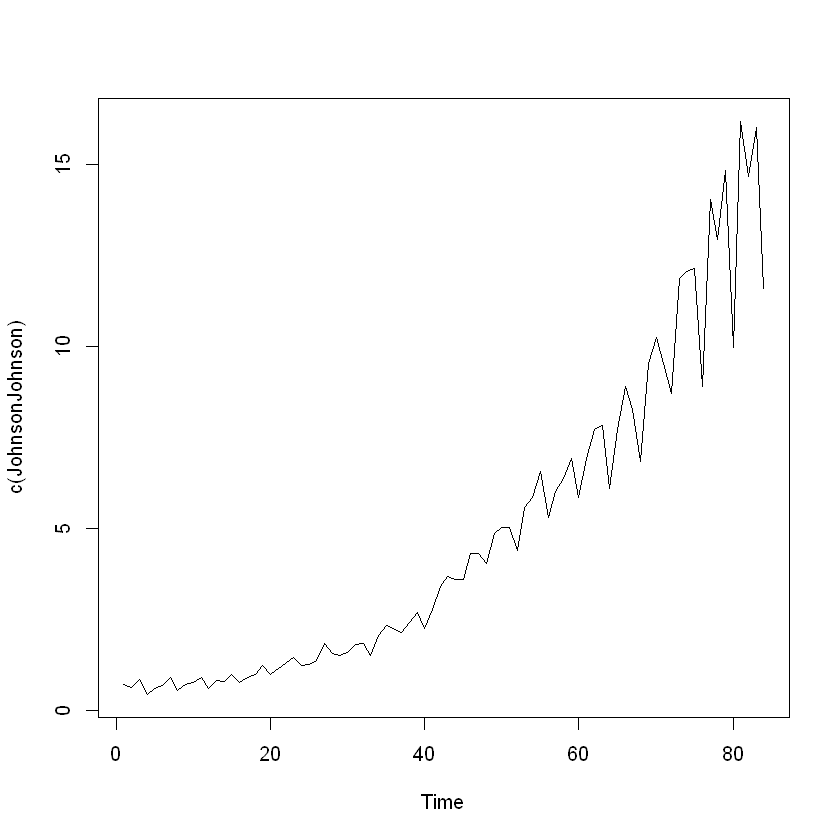

In [106]:
source("TSanalysis.R")
plot.ts(c(JohnsonJohnson))

# 1 Spectral Density and Periodigram

## 1.1 Duality between Spectral Density and Periodigram

In [ ]:
# Duality between spectral density and periodigram
Y.fromPeriod <- pgram(df$New.Cases)
maxFreqs.fromSpec <- specMax(df$New.Cases)

l <- length(df$New.Cases)
maxFreqs.fromPeriod <- localMaxima(Y.fromPeriod)
maxY.fromPeriod <- Y.fromPeriod[maxsIndex.fromPeriod]
maxFreqs.fromPeriod <- maxFreqs.fromPeriod[order(-maxY.fromPeriod)]/l

maxFreqs.fromPeriod
maxFreqs.fromSpec

Overlap between the largest spike in the spectral and periodigram domains

# 2.2 SARIMA 2

In [43]:
source("TSanalysis.R")

m2.2 <- sarima(df$New.Cases, p=0,d=1,q=1, P=1,D=1,Q=1,S=7, details = FALSE)

trueAR <- c(rep(0,6), m2.2$fit$coef[[2]])
trueMA <- c(m2.2$fit$coef[[1]], rep(0,5), m2.2$fit$coef[[3]], m2.2$fit$coef[[1]]*m2.2$fit$coef[[3]])

test <- backshiftPolynomialCoefficients(unname(m2.2$fit$coef), p=0,q=1, P=1,Q=1,S=7)
trueAR - test$AR[]; trueMA - test$MA[]

[1] 0 0 0 0 0 0 0

[1] 0 0 0 0 0 0 0 0

In [120]:
sarima2 <- function(df, p=0,d=0,q=0, P=0,D=0,Q=0,S=1, plot = TRUE) {
    
    model <- sarima(df, p,d,q, P,D,Q,S, details=FALSE)
    
    # non-seasonal difference:
    while (d > 0){
        df <- diff(df)
        d <- d-1
    }
    # seasonal difference:
    while (D > 0){
        df <- diff(df, lag = S)
        D <- D-1
    }
    
    acfs <- acf2(df, max.lag = (length(df)/2), plot = plot)
}